<a href="https://colab.research.google.com/github/erua0919/Colab/blob/main/wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 526 kB/s 
     |████████████████████████████████| 453 kB 57.6 MB/s 


In [7]:
# 그래프에서 한글표현을 위해 폰트를 설치합니다.
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum > /dev/null

In [8]:
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

In [9]:
# 기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

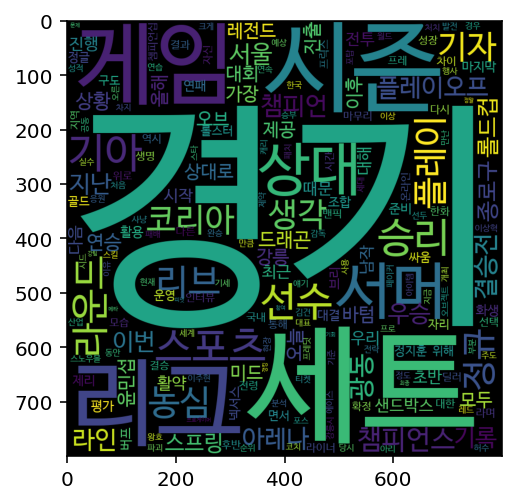

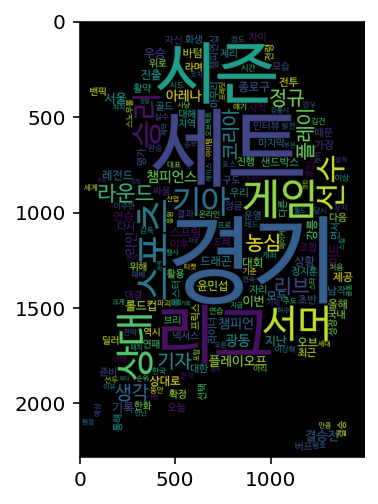

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import numpy as np


with open('./lck_text.txt', 'r', encoding='cp949') as f:
    text = f.read()

okt = Okt()
nouns = okt.nouns(text) # 명사만 추출

words = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외

c = Counter(words) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함
wc = WordCloud(font_path='NanumBarunGothic', width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
wc.to_file('./lck2.png')
plt.figure()
plt.imshow(gen)
img = Image.open('./s_korea.png')
img_array = np.array(img)

wc = WordCloud(font_path='NanumBarunGothic', width=400, height=400, scale=2.0, max_font_size=250, mask=img_array)
gen = wc.generate_from_frequencies(c)
wc.to_file('./lck1.png')
plt.figure()
plt.imshow(gen)